- [Dados de covid](https://brasil.io/)
- [Ações do Google](https://finance.yahoo.com/quote/GOOG/history?p=GOOG)
- [Dados refugiados](https://www.migrationdataportal.org/international-data?i=refug_host&t=2021&cm49=76)
- Corrente elétrica que passa por um resistor

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [6]:
amp = 1         # 1V        (Amplitude)
f = 1000        # 1kHz      (Frequency)
fs = 200000     # 200kHz    (Sample Rate)
T = 1/f
Ts = 1/fs

# Select if you want to display the sine as a continous wave
#  True = Continous (not able to zoom in x-direction)
#  False = Non-Continous  (able to zoom)
continous  = True

x = np.arange(fs)
y = [ amp*np.sin(2*np.pi*f * (i/fs)) for i in x]

In [9]:
y[1]

0.03141075907812829

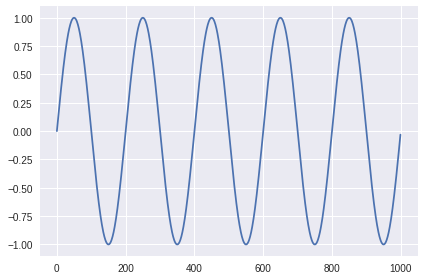

In [13]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x[:1000], y[:1000])
plt.tight_layout()
plt.savefig("imagens/ts_continua.eps")

In [2]:
np.pi

3.141592653589793

np.pi

# Dados de covid

In [25]:
covid_es = pd.read_csv("datasets/covid_es.csv", parse_dates=["date"])
covid_es.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-27,ES,NaN,state,1037188,14323,750,True,4018650.0,4064052.0,32.0,25521.03172,0.0138
1,2022-03-26,ES,NaN,state,1037086,14323,749,False,4018650.0,4064052.0,32.0,25518.52191,0.0138
2,2022-03-25,ES,NaN,state,1036359,14319,748,False,4018650.0,4064052.0,32.0,25500.63336,0.0138
3,2022-03-24,ES,NaN,state,1036087,14313,747,False,4018650.0,4064052.0,32.0,25493.94053,0.0138
4,2022-03-23,ES,NaN,state,1035955,14313,746,False,4018650.0,4064052.0,32.0,25490.69254,0.0138


In [27]:
covid_vix = covid_es[covid_es['city']=='Vitória']
covid_vix = covid_vix.sort_values(by="date")

''

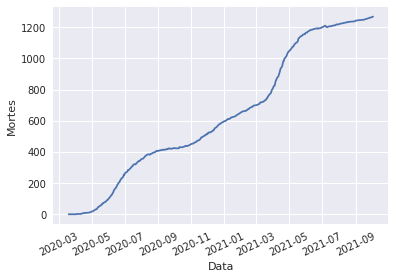

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(covid_vix['date'].values, covid_vix['deaths'].values)
ax.set_xlabel("Data")
ax.set_ylabel("Mortes")
plt.xticks(rotation=25)
plt.savefig("imagens/covid_es.eps");

# Ações do Google

In [2]:
goog = yf.Ticker("goog")
df_goog = goog.history(start="2022-05-01", end="2022-05-30")

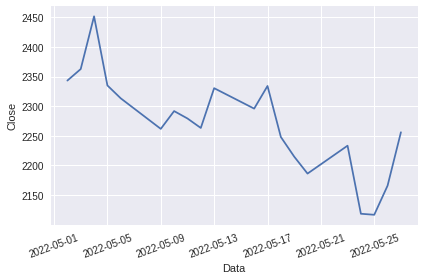

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(df_goog.index,df_goog['Close'])
ax.set_ylabel("Close")
ax.set_xlabel("Data")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("imagens/acoes_goog.eps")

# Refugiados

In [7]:
colunas = ["Year", "Country of Origin", "Country of Asylum", "Refugees under UNHCR’s mandate", "Asylum seekers", "IDPs of concern to UNHCR", "Venezuelans displaced abroad",  "Stateless persons", "Others of concern"]
columns_mapper = {i:colunas[i] for i in range(len(colunas))}
refugiados_brasil = pd.read_csv("datasets/refugees_br.csv",sep='\t', header=None)
refugiados_brasil.rename(columns=columns_mapper, inplace=True)
refugiados_brasil.sort_values(by='Year', inplace=True)

In [12]:
refugiados_brasil.head()

,Year,Country of Origin,Country of Asylum,Refugees under UNHCR’s mandate,Asylum seekers,IDPs of concern to UNHCR,Venezuelans displaced abroad,Stateless persons,Others of concern
52,1969,-,Brazil (BRA),40000,0,0,NaN,0,0
51,1970,-,Brazil (BRA),40000,0,0,NaN,0,0
33,1971,-,Brazil (BRA),38000,0,0,NaN,0,0
32,1972,-,Brazil (BRA),37000,0,0,NaN,0,0
50,1973,-,Brazil (BRA),35200,0,0,NaN,0,0


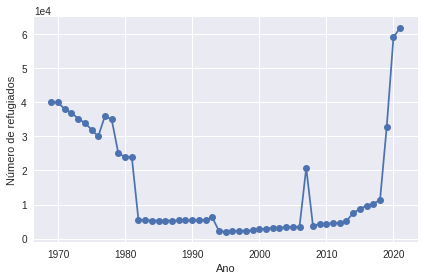

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
ano = refugiados_brasil['Year']
nrefugiados = refugiados_brasil['Refugees under UNHCR’s mandate']
ax.plot(ano, nrefugiados, marker='o')
ax.set_xlabel("Ano")
ax.set_ylabel("Número de refugiados")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.savefig("imagens/refugiados_brasil_onu.eps")

In [3]:
import numpy as np

In [44]:
np.random.seed(42)
A = np.random.randn(100)
B = np.random.randn(100)
C = np.random.uniform(-1, 1, size=100)

In [45]:
A[:20] = A[:20] + 5 
A[30:50] = A[30:50] + 5 
A[50:70] = A[50:70] + 5 
A[80:100] = A[80:100] + 5 

In [46]:
B[:20] = B[:20] - 5 
B[30:50] = B[30:50] - 5 
B[50:70] = B[50:70] - 5 
B[80:100] = B[80:100] - 5 

In [47]:
for j in range(4):
    i = np.random.randint(low=0, high=80)
    C[i:i+20] = C[i:i+20] + 7

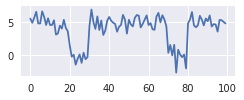

In [62]:
fig, ax = plt.subplots(figsize=(3.5,1.5))
ax.plot(A)
plt.tight_layout()
plt.savefig("serie_A.png")

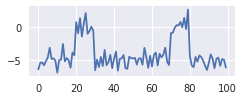

In [63]:
fig, ax = plt.subplots(figsize=(3.5,1.5))
ax.plot(B)
plt.tight_layout()
plt.savefig("serie_B.png")

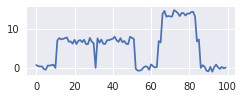

In [64]:
fig, ax = plt.subplots(figsize=(3.5,1.5))
ax.plot(C)
plt.tight_layout()
plt.savefig("serie_C.png")

In [4]:
np.random.seed(42)
r = np.random.randint(0, 10, size=10)
f = r + np.random.randn(len(r))

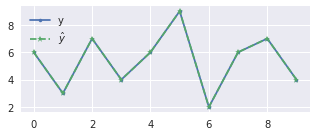

In [6]:
fig, ax = plt.subplots(figsize=(4.5,2.))
ax.plot(r, marker='.', label='y')
ax.plot(r, marker="*", ls='--', label=r'$\hat{y}$')
plt.tight_layout()
plt.legend();
plt.savefig("series_iguais.png")

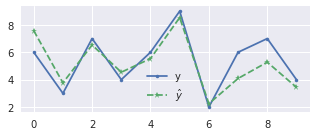

In [7]:
fig, ax = plt.subplots(figsize=(4.5,2.))
ax.plot(r, marker='.', label='y')
ax.plot(f, marker="*", ls='--', label=r'$\hat{y}$')
plt.tight_layout()
plt.legend()
plt.savefig("series_diferentes.png")

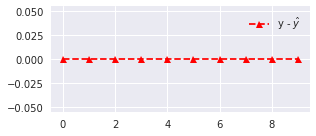

In [8]:
fig, ax = plt.subplots(figsize=(4.5,2.))
ax.plot(r-r, marker="^", c='r', ls='--', label=r'y - $\hat{y}$')
plt.tight_layout()
plt.legend()
plt.savefig("erro_zero.png")

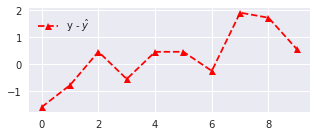

In [10]:
fig, ax = plt.subplots(figsize=(4.5,2.))
ax.plot(r-f, marker="^", c='r', ls='--', label=r'y - $\hat{y}$')
plt.tight_layout()
plt.legend()
plt.savefig("erro_.png")